In [ ]:
!pip install linearmodels

In [90]:
# The code printing the panel regression results and visualising linear relationships between two of the variables.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns
from linearmodels.panel import RandomEffects

data_to_vis = pd.read_csv('combined_data.csv')
data_to_vis.head()
data_pivot = data_to_vis.pivot_table(index=['Country', 'Year'])
data_pivot.head()

chosen_var = 'Environment_Expenditure'

model4 = RandomEffects.from_formula(chosen_var+" ~ 1 + Temperature_Change+G7_dummy*Temperature_Change +EntityEffects", data=data_pivot)
z = model4.fit()
#print(z)
print('For your variable '+chosen_var+' the results are: ')
print('\n calculated parameters \n', z.params)
print('\n confidence intervals\n', z.conf_int())#['lower'][0])
print('R2', z.rsquared)
print('No. of observations', z.nobs)


For your variable Environment_Expenditure the results are: 

 calculated parameters 
 Intercept                      0.429787
Temperature_Change             0.024483
G7_dummy                       0.000601
G7_dummy:Temperature_Change   -0.001747
Name: parameter, dtype: float64

 confidence intervals
                                 lower     upper
Intercept                    0.335455  0.524120
Temperature_Change          -0.025098  0.074065
G7_dummy                    -0.052631  0.053834
G7_dummy:Temperature_Change -0.055175  0.051682
R2 0.0015112428702659386
No. of observations 1829


/opt/conda/lib/python3.10/site-packages/linearmodels/panel/model.py:2616: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


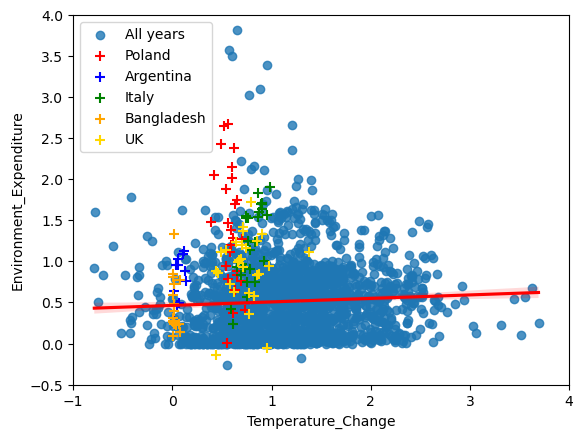

In [57]:
data_no_nan = data_to_vis[[ 'Year', 'Country','Environment_Expenditure', 'Temperature_Change', 'G7_dummy']].dropna()

sns.regplot(x='Temperature_Change', y = 'Environment_Expenditure', 
                data=data_no_nan[['Environment_Expenditure','Temperature_Change', 'Country']],
               label=str('All years'), line_kws={'color':'red'}, fit_reg=False)
plt.scatter(x = data_no_nan[data_no_nan['Country'] == 'POL']['Environment_Expenditure'],
                y = data_no_nan[data_no_nan['Country'] == 'POL']['Temperature_Change'], 
                marker='+', s=50, c = 'red', label = 'Poland')
plt.scatter(x = data_no_nan[data_no_nan['Country'] == 'ARG']['Environment_Expenditure'],
                y = data_no_nan[data_no_nan['Country'] == 'ARG']['Temperature_Change'], 
                marker='+', s=50, c = 'blue', label = 'Argentina')
plt.scatter(x = data_no_nan[data_no_nan['Country'] == 'ITA']['Environment_Expenditure'],
                y = data_no_nan[data_no_nan['Country'] == 'ITA']['Temperature_Change'], 
                marker='+', s=50, c = 'green', label = 'Italy')
plt.scatter(x = data_no_nan[data_no_nan['Country'] == 'BGD']['Environment_Expenditure'],
           y = data_no_nan[data_no_nan['Country'] == 'BGD']['Temperature_Change'], 
                marker='+', s=50, c = 'orange', label = 'Bangladesh')
plt.scatter(x = data_no_nan[data_no_nan['Country'] == 'GBR']['Environment_Expenditure'],
                y = data_no_nan[data_no_nan['Country'] == 'GBR']['Temperature_Change'], 
                marker='+', s=50, c = 'gold', label = 'UK')
plt.xlim([-1,4])
plt.ylim([-0.5,4])
plt.legend(loc='upper left')
#plt.savefig('vis_example.png')

In [44]:
#data_year = data_no_nan[data_no_nan['Year']==2008]

In [55]:
import matplotlib.animation as animation



def plot_scatters(year):
    plt.figure(0)
    data_year = data_no_nan[data_no_nan['Year']==year]
    sns.regplot(x='Temperature_Change', y = 'Environment_Expenditure', 
                data=data_year[['Environment_Expenditure','Temperature_Change', 'Country']],
               label=str(year), scatter_kws={})
    plt.scatter(x = data_year[data_year['Country'] == 'POL']['Environment_Expenditure'],
                y = data_year[data_year['Country'] == 'POL']['Temperature_Change'], 
                marker='+', s=50, c = 'red', label = 'Poland')
    plt.scatter(x = data_year[data_year['Country'] == 'ARG']['Environment_Expenditure'],
                y = data_year[data_year['Country'] == 'ARG']['Temperature_Change'], 
                marker='+', s=50, c = 'blue', label = 'Argentina')
    plt.scatter(x = data_year[data_year['Country'] == 'ITA']['Environment_Expenditure'],
                y = data_year[data_year['Country'] == 'ITA']['Temperature_Change'], 
                marker='+', s=50, c = 'green', label = 'Italy')
    plt.scatter(x = data_year[data_year['Country'] == 'BGD']['Environment_Expenditure'],
                y = data_year[data_year['Country'] == 'BGD']['Temperature_Change'], 
                marker='+', s=50, c = 'orange', label = 'Bangladesh')
    plt.scatter(x = data_year[data_year['Country'] == 'GBR']['Environment_Expenditure'],
                y = data_year[data_year['Country'] == 'GBR']['Temperature_Change'], 
                marker='+', s=50, c = 'gold', label = 'UK')
    plt.xlim([-1,4])
    plt.ylim([-0.5,4])
    plt.legend(loc='upper left')




widgets.interact(plot_scatters, year = widgets.IntSlider(value=min(data_no_nan['Year']),
                                               min=min(data_no_nan['Year']),
                                               max=max(data_no_nan['Year'])))



interactive(children=(IntSlider(value=1995, description='year', max=2021, min=1995), Output()), _dom_classes=(…

<function __main__.plot_scatters(year)>

In [ ]:
data_no_nan[data_no_nan['Year']==2006][['Environment_Expenditure','Temperature_Change', 'Country']]